# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5



Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

После ряда нехитрых матричных преобразований, получим:

$∇_wQ = -\frac{2}{\ell}X^T(y-Xw)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [1]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape[0] == y.shape[0], f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/problems/A/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/problems/B/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/problems/C/


* **Adam**: https://contest.yandex.ru/contest/54610/problems/D/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/problems/E/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [9]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [10]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


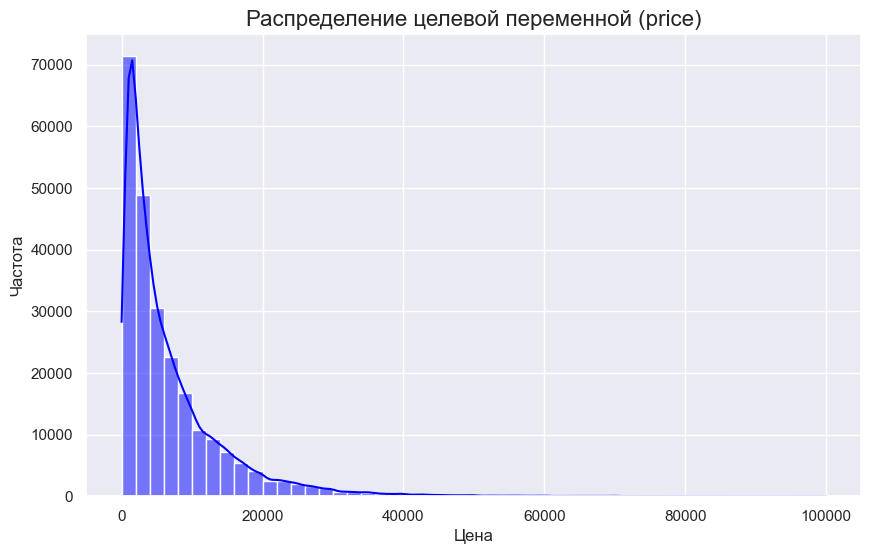

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50, color='blue')

plt.title('Распределение целевой переменной (price)', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.show()


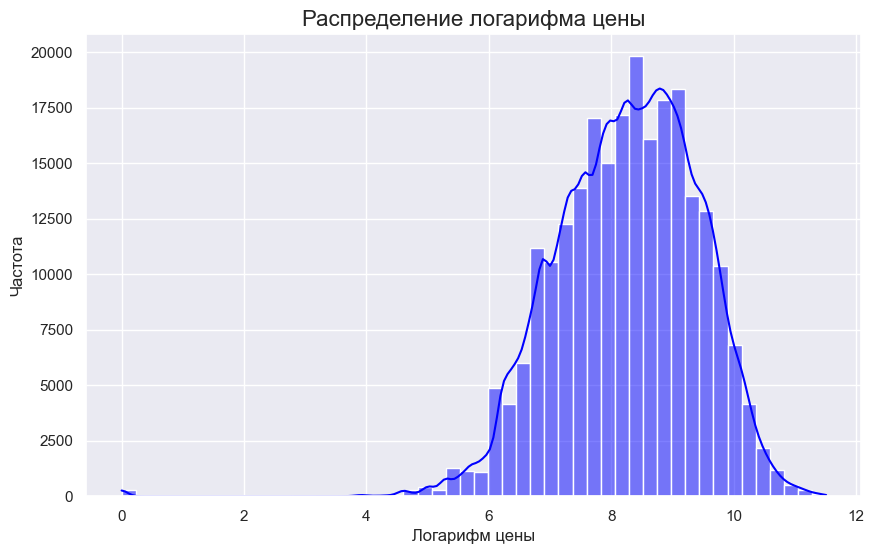

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['price']), kde=True, bins=50, color='blue')

plt.title('Распределение логарифма цены', fontsize=16)
plt.xlabel('Логарифм цены', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.show()


Построив графики распределения целевой переменной, я убедилась, что лучшим решением будет **работать с логарифмом цены** в качестве таргета. Нетрудно заметить, что из-за большого разброса цен, график без логарифирования является не сильно информативным. Также, при таком разбросе целевой перменной линейная регрессия может работать некорректно.

Удалим выбросы для построения более точной модели:

In [14]:
data = data[(np.log(data['price']) > 4) & (np.log(data['price']) < 12)]
data['log_price']= np.log(data['price'])
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Построим зависимость цены от различных признаков:

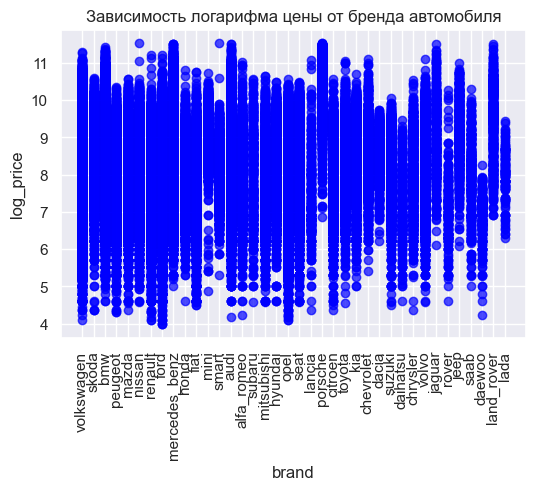

In [15]:
# price by brand
plt.figure(figsize=(6, 4))
plt.scatter(data['brand'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость логарифма цены от бренда автомобиля')
plt.xlabel('brand')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

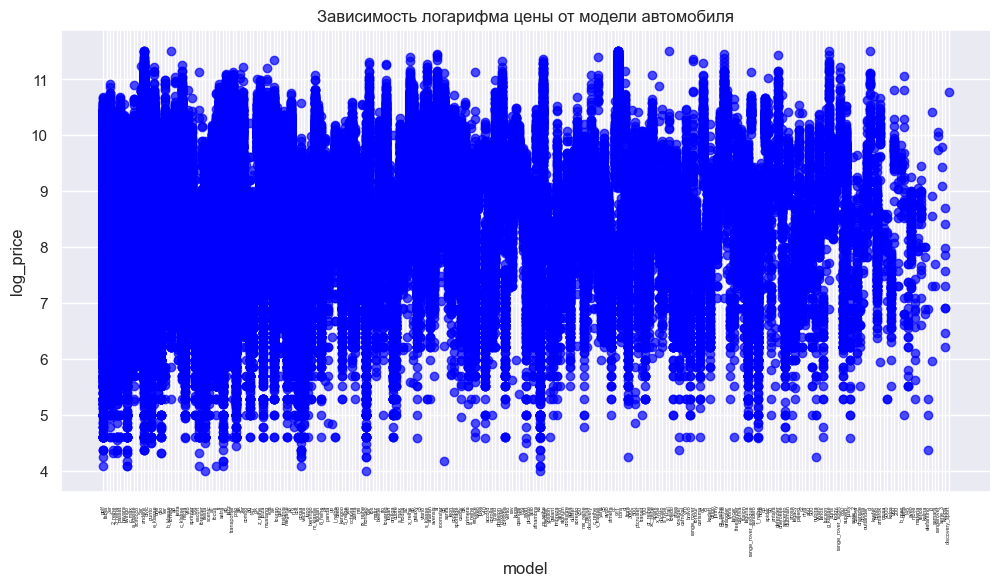

In [16]:
# price by brand
plt.figure(figsize=(12, 6))
plt.scatter(data['model'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость логарифма цены от модели автомобиля')
plt.xlabel('model')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90, fontsize=4)
plt.show()

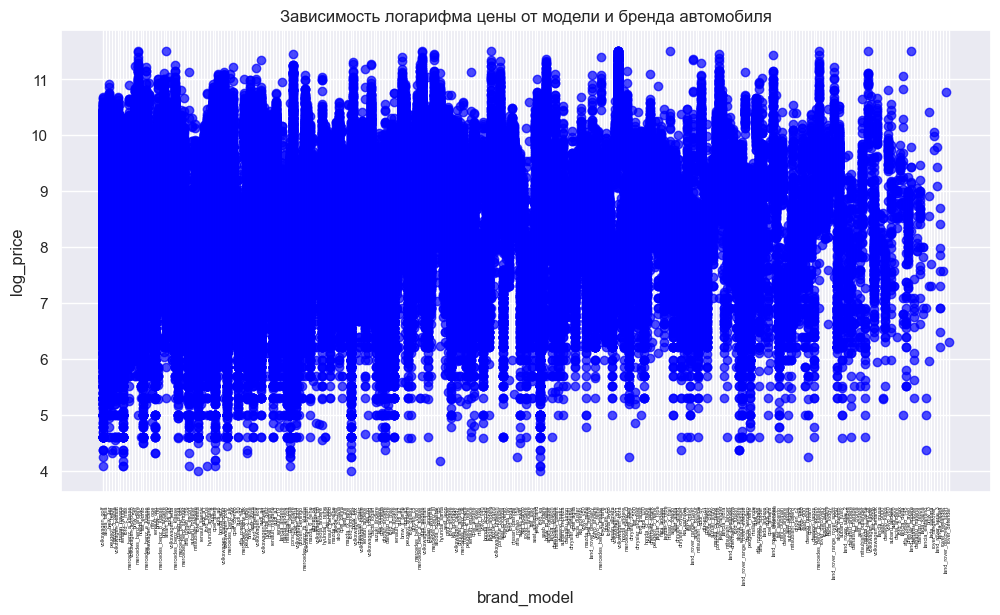

In [17]:
data['brand_model'] = data['brand'] + '_' + data['model']

plt.figure(figsize=(12, 6))
plt.scatter(data['brand_model'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость логарифма цены от модели и бренда автомобиля')
plt.xlabel('brand_model')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90, fontsize=4)
plt.show()

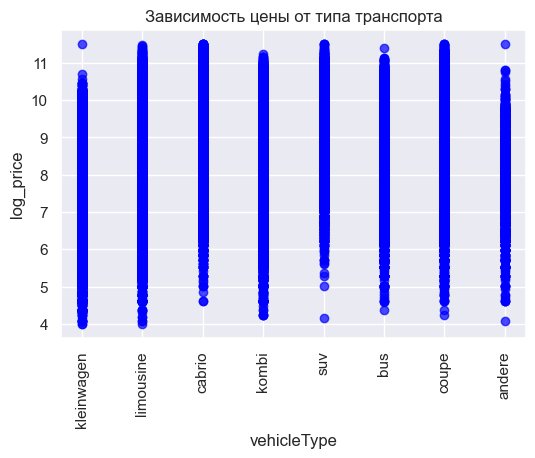

In [18]:
# price by transort type
plt.figure(figsize=(6, 4))
plt.scatter(data['vehicleType'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от типа транспорта')
plt.xlabel('vehicleType')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

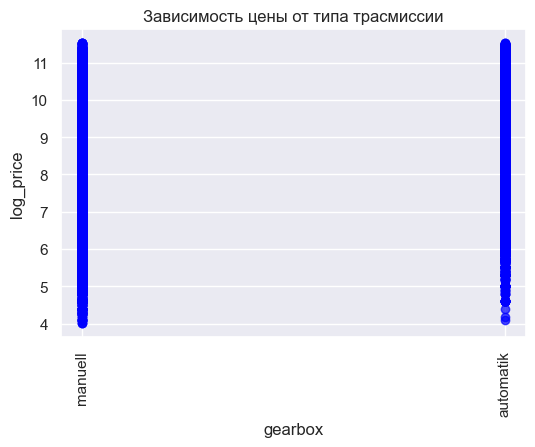

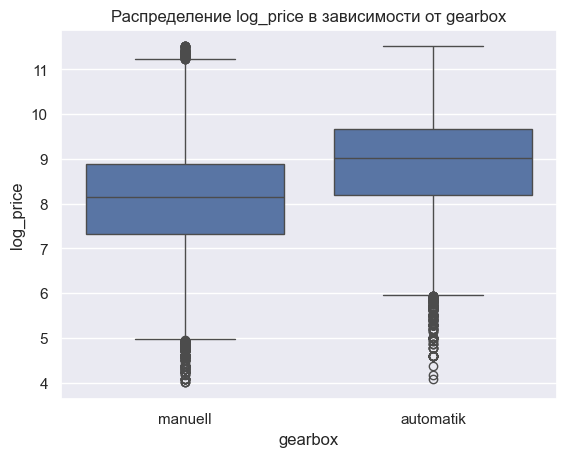

In [19]:
# price by gearbox
plt.figure(figsize=(6, 4))
plt.scatter(data['gearbox'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от типа трасмиссии')
plt.xlabel('gearbox')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='gearbox', y='log_price', data=data)
plt.title('Распределение log_price в зависимости от gearbox')
plt.xlabel('gearbox')
plt.ylabel('log_price')
plt.show()

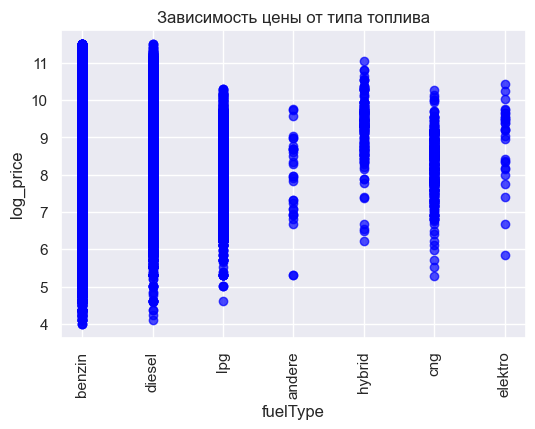

In [20]:
# price by fuelType
plt.figure(figsize=(6, 4))
plt.scatter(data['fuelType'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от типа топлива')
plt.xlabel('fuelType')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

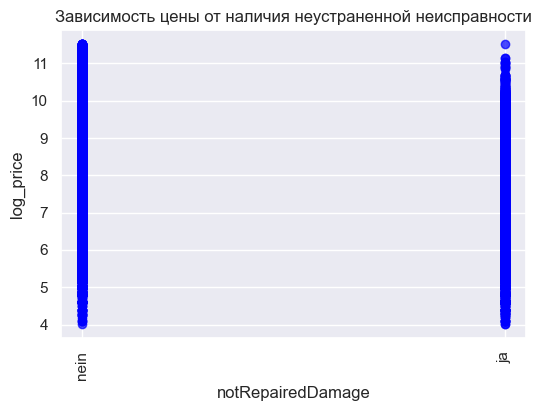

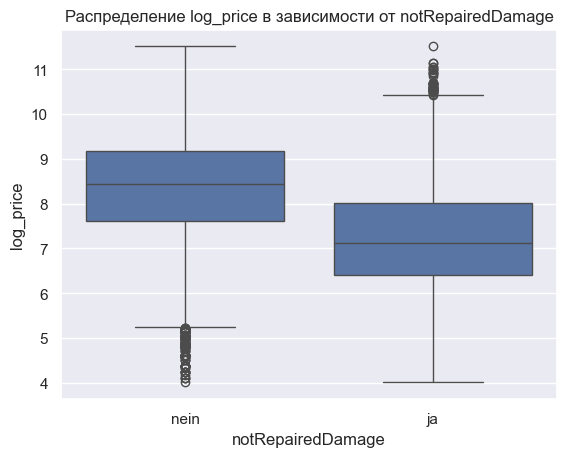

In [21]:
# price by notRepairedDamage
plt.figure(figsize=(6, 4))
plt.scatter(data['notRepairedDamage'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от наличия неустраненной неисправности')
plt.xlabel('notRepairedDamage')
plt.ylabel('log_price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


sns.boxplot(x='notRepairedDamage', y='log_price', data=data)
plt.title('Распределение log_price в зависимости от notRepairedDamage')
plt.xlabel('notRepairedDamage')
plt.ylabel('log_price')
plt.show()

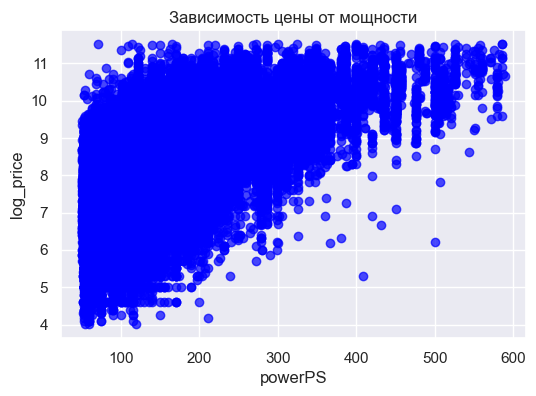

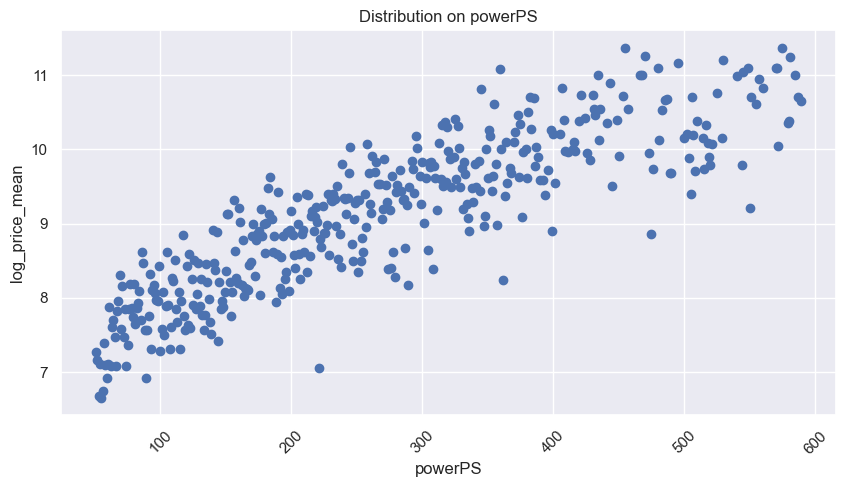

In [22]:
# price by powerPS
plt.figure(figsize=(6, 4))
plt.scatter(data['powerPS'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от мощности')
plt.xlabel('powerPS')
plt.ylabel('log_price')
plt.grid(True)
plt.show()

to_plot = data.groupby('powerPS')['log_price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(to_plot['powerPS'], to_plot['log_price'])
plt.title('Distribution on powerPS')
plt.xlabel('powerPS')
plt.ylabel('log_price_mean')
plt.xticks(rotation=45)
plt.show()

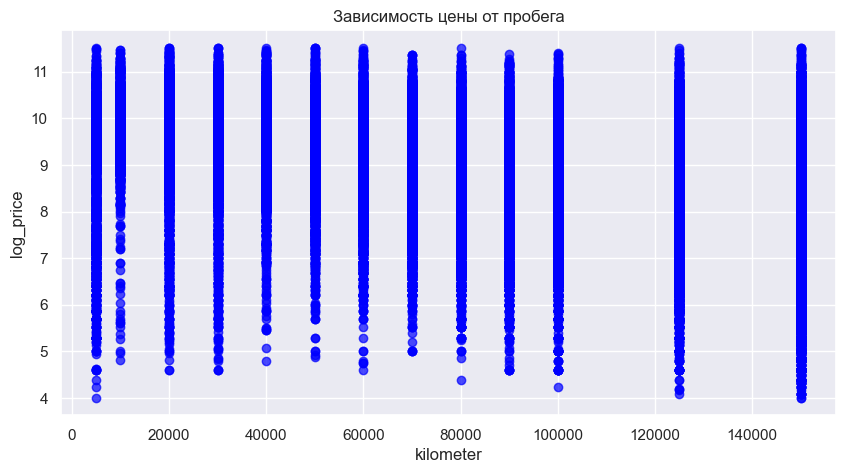

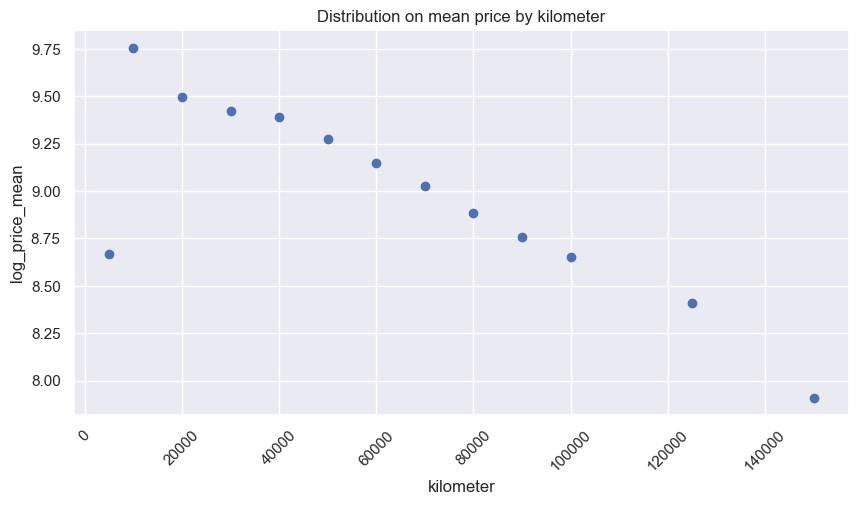

In [23]:
# price by kilometer
plt.figure(figsize=(10, 5))
plt.scatter(data['kilometer'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от пробега')
plt.xlabel('kilometer')
plt.ylabel('log_price')
plt.grid(True)
plt.show()

to_plot = data.groupby('kilometer')['log_price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(to_plot['kilometer'], to_plot['log_price'])
plt.title('Distribution on mean price by kilometer')
plt.xlabel('kilometer')
plt.ylabel('log_price_mean')
plt.xticks(rotation=45)
plt.show()


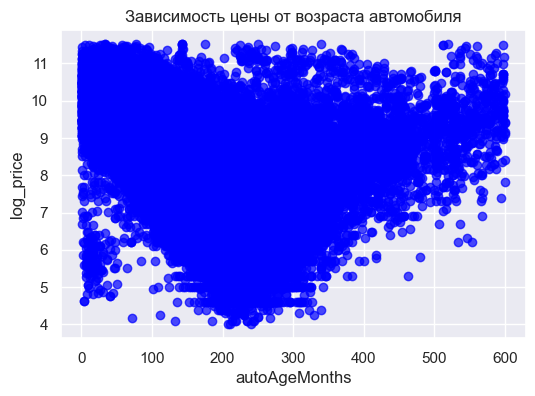

In [24]:
# price by autoAgeMonths
plt.figure(figsize=(6, 4))
plt.scatter(data['autoAgeMonths'], data['log_price'], alpha=0.7, color='blue')
plt.title('Зависимость цены от возраста автомобиля')
plt.xlabel('autoAgeMonths')
plt.ylabel('log_price')
plt.grid(True)
plt.show()

Наиболее полезными будут признаки, глядя на графики которых, можно проследить зависимость цены. В нашем случае я решила не учитывать признак model, так как он содержит слишком большое количество категорий, что может ухудшить качество модели. Для категориальных признаков уместно применить OneHotEncoding, для численных -- StandartScaler.

Также могло быть уместно создать новый признак brand_model, объединив признаки brand и model в один. Однако, данное объединение не сильно повлияло на результат (см. график 3), в связи с чем, признак был удален.

Ниже удалим выбросы:

In [25]:
data = data[~((data['vehicleType'] == 'suv') & (data['log_price'] < 5))]
data = data[~((data['vehicleType'] == 'kleinwagen') | (data['vehicleType'] == 'andere') & (data['log_price'] > 11))]
data = data[~((data['fuelType'] == 'andere') & (data['log_price'] < 6))]
data = data[~((data['fuelType'] == 'elektro') & (data['log_price'] < 7))]
data = data.drop(columns=['price', 'brand_model'], axis = 1)
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.600902
5,volkswagen,passat,kombi,manuell,diesel,ja,140,150000,124,7.937017
6,nissan,navara,suv,manuell,diesel,nein,190,70000,61,9.798071


In [26]:
categorical = ['brand', 'vehicleType', 'fuelType', 'notRepairedDamage', 'kilometer', 'gearbox']
numeric = ['powerPS',  'autoAgeMonths']
other = []
# , 'model'
# YOUR CODE (EDA):

In [27]:
data['bias'] = 1
other += ['bias']

x = pd.DataFrame(data[categorical + numeric + other])
y = pd.DataFrame(data['log_price'])

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other', 'passthrough', other)
])

x = column_transformer.fit_transform(x)


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [33]:
from sklearn.model_selection import GridSearchCV
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np

In [34]:
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

In [36]:
lambda_options = list(np.logspace(-2., -0.5, 10))
best_lambdas = []
descent_options = ['full', 'stochastic', 'momentum', 'adam']

dim = x_train.shape[1]
losses_list = []
iter_list = []
num_iterations = 0
i = 0
best_loss_history_noreg=[]

for d in descent_options:
    best_lambda = None
    lambda_loss = []
    n_iters = []
    best_error = -np.inf
    for lambda_val in lambda_options:
        descent_config = {
            'descent_name': d,
            'kwargs': {
                'dimension': dim,
                'lambda_': lambda_val
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(x_train, y_train)

        n_iterations = len(model.loss_history)
        n_iters.append(n_iterations)

        error_valid = model.r2_error(x_valid, y_valid)
        lambda_loss.append(error_valid)

        if error_valid > best_error:
            best_error = error_valid
            best_lambda = lambda_val
            best_loss_history = model.loss_history
            best_model = model

    
    best_loss_history_noreg.append(best_loss_history)
    print("Модель:", d)
    losses_list.append(lambda_loss)
    best_lambdas.append(best_lambda)
    iter_list.append(n_iters)

    error_train = model.r2_error(x_train, y_train)
    print(f'Ошибка на обучающей выборке: {error_train}')
    error_test = model.r2_error(x_test, y_test)
    print(f'Ошибка на тестовой выборке: {error_test}')

    print(f'Лучшая ошибка на валидационной выборке: {best_error}')
    print(f'Лучшая лямбда: {best_lambda}')
    print()

   


Модель: full
Ошибка на обучающей выборке: 0.628357200298296
Ошибка на тестовой выборке: 0.6279083756520171
Лучшая ошибка на валидационной выборке: 0.6332096146352642
Лучшая лямбда: 0.31622776601683794

Модель: stochastic
Ошибка на обучающей выборке: 0.6630438871294146
Ошибка на тестовой выборке: 0.660865786908537
Лучшая ошибка на валидационной выборке: 0.6648846353078703
Лучшая лямбда: 0.31622776601683794

Модель: momentum
Ошибка на обучающей выборке: 0.730516022602351
Ошибка на тестовой выборке: 0.7295844280817008
Лучшая ошибка на валидационной выборке: 0.7330070381669518
Лучшая лямбда: 0.31622776601683794

Модель: adam
Ошибка на обучающей выборке: 0.7446719493348832
Ошибка на тестовой выборке: 0.742935123409642
Лучшая ошибка на валидационной выборке: 0.7471080426160805
Лучшая лямбда: 0.31622776601683794



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

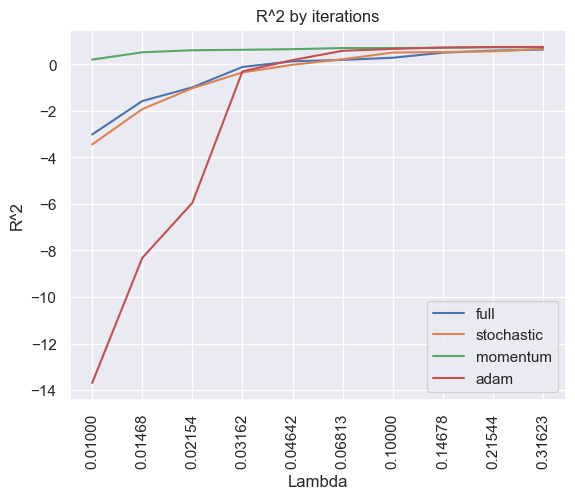

In [37]:
descent_options = ['full', 'stochastic', 'momentum', 'adam']
for i, losses in enumerate(losses_list):
    plt.plot(losses, label=descent_options[i])
plt.xticks(range(len(losses_list[0])), [f"{x:0.5f}" for x in lambda_options], rotation = 'vertical')

plt.xlabel("Iterations")
plt.ylabel("R^2")
plt.title("R^2 by iterations")
plt.legend()
plt.show()

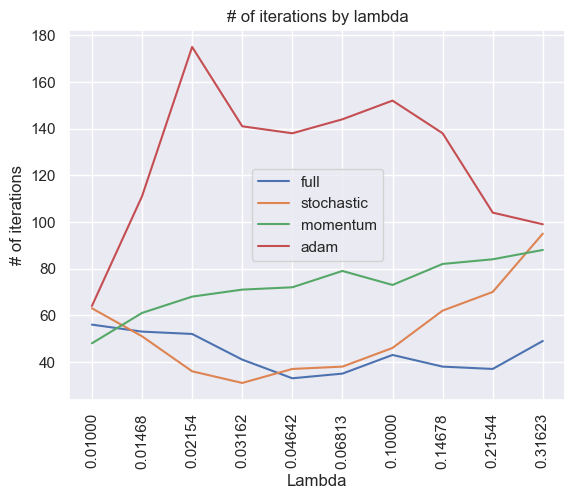

In [38]:
descent_options = ['full', 'stochastic', 'momentum', 'adam']
for i, n_iters in enumerate(iter_list):
    plt.plot(n_iters, label=descent_options[i])
plt.xticks(range(len(iter_list[0])), [f"{x:0.5f}" for x in lambda_options], rotation = 'vertical')

plt.xlabel("Lambda")
plt.ylabel("# of iterations")
plt.title("# of iterations by lambda")
plt.legend()
plt.show()

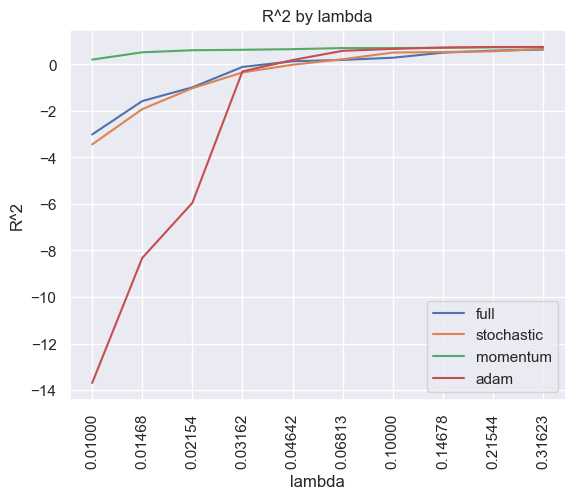

In [42]:
descent_options = ['full', 'stochastic', 'momentum', 'adam']
for i, losses in enumerate(losses_list):
    plt.plot(losses, label=descent_options[i])
plt.xticks(range(len(losses_list[0])), [f"{x:0.5f}" for x in lambda_options], rotation = 'vertical')

plt.xlabel("lambda")
plt.ylabel("R^2")
plt.title("R^2 by lambda")
plt.legend()
plt.show()

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Используем наилучшую лябду, найденную в номере 5.

In [43]:
import time

time.time()

1731668524.5720348

In [44]:
batch_sizes = np.arange(5, 500, 10)

dim = x_train.shape[1]

lambda_loss = []
best_error = -np.inf

avg_time_list = []
avg_iter_list = []


for batch in batch_sizes:
    n_iters = []
    time_list = []
    for i in range(10):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': dim,
                'lambda_': 0.31622776601683794
            }
        }
        model = LinearRegression(descent_config=descent_config)
        start_time = time.time()
        model.fit(x_train, y_train)
        end_time = time.time()

        time_took = end_time - start_time
        time_list.append(time_took)

        n_iterations = len(model.loss_history)
        n_iters.append(n_iterations)   # list of iterations to convergency



    avg_n_iterations = np.array(n_iters).mean()
    avg_iter_list.append(avg_n_iterations)
    avg_time_took = np.array(time_list).mean()
    avg_time_list.append(avg_time_took)

    iter_list.append(n_iters)

    print("Размер батча:", batch)
    print("Время в секундах:", time_list)
    print("Среднее время:", avg_time_took)
    print("Число итераций до сходимости:", n_iters)
    print("Среднее число итераций:", avg_n_iterations)
    print()

Размер батча: 5
Время в секундах: [0.7576298713684082, 0.822655200958252, 0.731029748916626, 1.0897612571716309, 1.0576908588409424, 0.8498020172119141, 0.8878974914550781, 0.9900991916656494, 0.6627311706542969, 0.7419874668121338]
Среднее время: 0.8591284275054931
Число итераций до сходимости: [97, 92, 94, 130, 117, 108, 114, 127, 85, 101]
Среднее число итераций: 106.5

Размер батча: 15
Время в секундах: [0.7768971920013428, 0.8111391067504883, 0.6279881000518799, 0.7598159313201904, 0.8348731994628906, 0.8562874794006348, 0.7160665988922119, 0.9303789138793945, 0.8232975006103516, 0.615966796875]
Среднее время: 0.7752710819244385
Число итераций до сходимости: [97, 102, 70, 95, 107, 108, 93, 119, 109, 80]
Среднее число итераций: 98.0

Размер батча: 25
Время в секундах: [1.0213303565979004, 0.6625440120697021, 0.6864433288574219, 0.7689392566680908, 0.9361710548400879, 0.8388068675994873, 0.9445993900299072, 0.9491825103759766, 0.5387606620788574, 1.1084496974945068]
Среднее время: 0.

C:\Users\79636\AppData\Local\Temp\ipykernel_37312\12908185.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


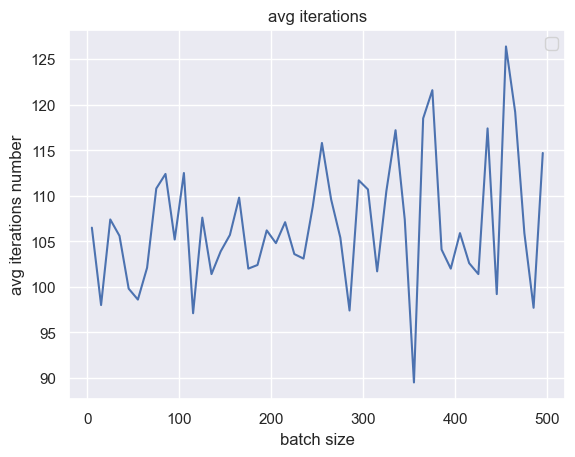

In [45]:
plt.plot(batch_sizes, avg_iter_list)

plt.xlabel("batch size")
plt.ylabel("avg iterations number")
plt.title("avg iterations")
plt.legend()
plt.show()

C:\Users\79636\AppData\Local\Temp\ipykernel_37312\849949340.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


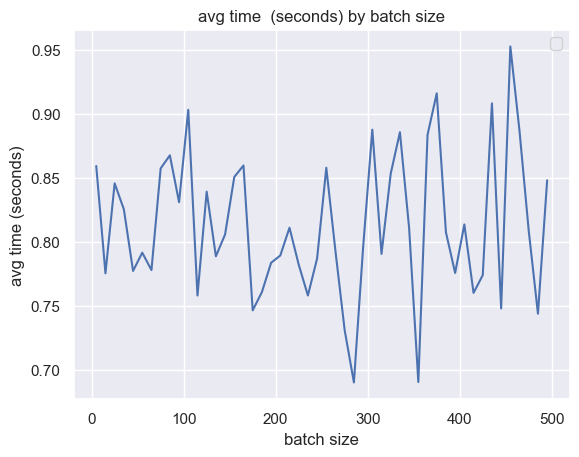

In [46]:
plt.plot(batch_sizes, avg_time_list)

plt.xlabel("batch size")
plt.ylabel("avg time (seconds)")
plt.title("avg time  (seconds) by batch size")
plt.legend()
plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [47]:
import numpy as np

lambda_options = list(np.logspace(-2., -0.5, 10))
mu_options = np.logspace(-6, 0, num=10)
best_lambdas = []
descent_options = ['full', 'stochastic', 'momentum', 'adam']

dim = x_train.shape[1]
losses_list = []
iter_list = []
results = []
best_loss_history_reg = []

for d in descent_options:
    best_lambda = None
    best_mu = None
    mu_lambda_loss = []
    n_iters = []
    best_error = -np.inf

    for mu_val in mu_options:
        for lambda_val in lambda_options:
            descent_config = {
                'descent_name': d,
                'regularized': True,
                'kwargs': {
                    'dimension': dim,
                    'lambda_': lambda_val,
                    'mu': mu_val 
                }
            }
            model = LinearRegression(descent_config=descent_config)
            model.fit(x_train, y_train)

            n_iterations = len(model.loss_history)
            n_iters.append(n_iterations)

            error_valid = model.r2_error(x_valid, y_valid)
            mu_lambda_loss.append(error_valid)

            if error_valid > best_error:
                best_error = error_valid
                best_lambda = lambda_val
                best_mu = mu_val
                best_loss_history = model.loss_history
                best_model = model
    result = {
        'method': d,
        'best_lambda': best_lambda,
        'best_mu': best_mu,
        'losses': best_loss_history,
        'train_error': best_model.r2_error(x_train, y_train),
        'test_error': best_model.r2_error(x_test, y_test),
        'valid_error': best_model.r2_error(x_valid, y_valid)
    }
    results.append(result)
    best_loss_history_reg.append(best_loss_history)


    print(f"Модель: {d}")
    losses_list.append(mu_lambda_loss)
    best_lambdas.append(best_lambda)
    iter_list.append(n_iters)

    # error_train = model.r2_error(x_train, y_train)
    print(f'Ошибка на обучающей выборке: {result["train_error"]}')
    # error_test = model.r2_error(x_test, y_test)
    print(f'Ошибка на тестовой выборке: {result["test_error"]}')

    print(f'Лучшая ошибка на валидационной выборке: {result["valid_error"]}')
    print(f'Лучшая лямбда: {result["best_lambda"]}')
    print(f'Лучшее значение mu: {result["best_mu"]}')
    print(f'Количество итераций до сходимости: {len(best_loss_history)}')
    print()


Модель: full
Ошибка на обучающей выборке: 0.6488979305843523
Ошибка на тестовой выборке: 0.648650987200905
Лучшая ошибка на валидационной выборке: 0.6517073365432724
Лучшая лямбда: 0.31622776601683794
Лучшее значение mu: 4.641588833612782e-06
Количество итераций до сходимости: 44

Модель: stochastic
Ошибка на обучающей выборке: 0.6364098225069998
Ошибка на тестовой выборке: 0.6339030470471742
Лучшая ошибка на валидационной выборке: 0.6407874487695298
Лучшая лямбда: 0.31622776601683794
Лучшее значение mu: 0.0001
Количество итераций до сходимости: 42

Модель: momentum
Ошибка на обучающей выборке: 0.7328250692150382
Ошибка на тестовой выборке: 0.7314637074355371
Лучшая ошибка на валидационной выборке: 0.7357521600052768
Лучшая лямбда: 0.31622776601683794
Лучшее значение mu: 2.1544346900318823e-05
Количество итераций до сходимости: 88

Модель: adam
Ошибка на обучающей выборке: 0.7447385088125597
Ошибка на тестовой выборке: 0.7429631355331284
Лучшая ошибка на валидационной выборке: 0.747379

`### ваше решение тут ###`

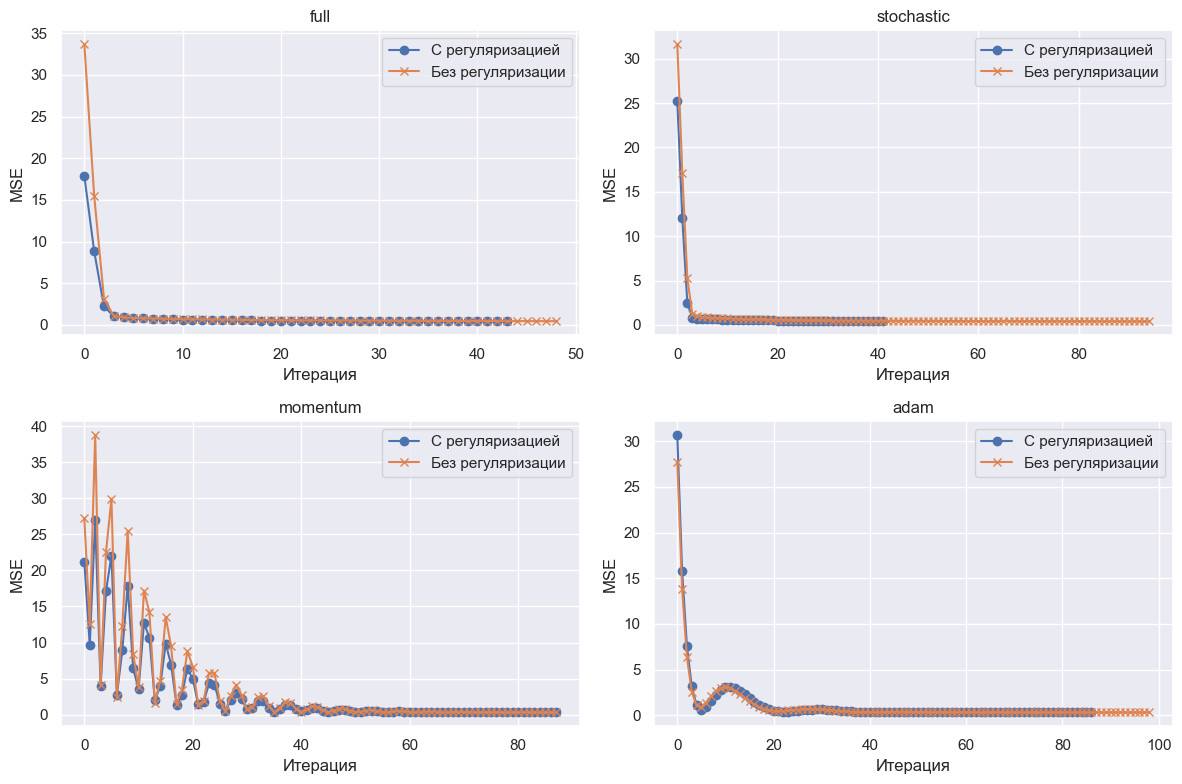

In [52]:
plt.figure(figsize=(12, 8))

for i, method in enumerate(descent_options):
    plt.subplot(2, 2, i + 1)  # Расположим графики в сетке 2x2
    plt.plot(best_loss_history_reg[i], label='С регуляризацией', marker='o')
    plt.plot(best_loss_history_noreg[i], label='Без регуляризации', marker='x')
    plt.title(method)
    plt.xlabel('Итерация')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

урааааа!! дошла наконец до любимого задания) в общем, я сейчас на программе мобильности в Стамбуле, поэтому угощала своим блюдом я иностранных гостей. (надеюсь они не просто сделали вид, а им правда понравилось)) Вашему вниманию представляется салат из всего, что было: огурцы, помидоры, зелень, киноа, оливки, фасоль, кукуруза и курица. Всё это приправляем солью, маслом, специями, и получаем вкусное блюдо и  довольного гостя)
Салат восторг, рецепт от самого сердца!!

а вот и ссылка на довольного гостя: https://drive.google.com/file/d/13x5jANFaHK_PX5bOpciyid0AI3fWsmxu/view?usp=sharing

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: